In [122]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
import random
from collections import defaultdict



## Data Generation

In [ ]:

def make_blobs():
    # build blobs for demonstration
    n_samples = 2000
    n_features = 2
    n_centre  = 5
    cluster_stds = [3.0, 0.9, 1.9, 1.9, 1.3]
    X,y = datasets.make_blobs(n_samples=n_samples,
                                 centers=n_centre,
                                 n_features = n_features,
                                 cluster_std=cluster_stds,
                                 random_state=42)
    
    # create a Pandas dataframe for the data
    df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1,n_features+1)])
    df.index.name = 'record'
    return df,y

df,y_orig = make_blobs()

In [46]:
df.head()

,Feature_1,Feature_2
record,,
0,3.841773,2.416685
1,-1.989655,10.170238
2,4.475272,3.210558
3,-4.778250,4.747525
4,6.109967,0.941459


# Algorithm Runner

In [120]:
import matplotlib.pyplot as plt

def print_clusters(max_iter,centroids,df):
    
    for i in range(max_iter):
        plt.figure()
        a = np.array(each_step_centroids[i][:])
        plt.scatter(a[:,0],a[:,1],color='black')
        plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.1,color='green')
        plt.xlabel('Feature_1')
        plt.ylabel('Feature_2')
        plt.show()
        
def get_cluters_random(df,centre=None):
    
    centroids = []
    visited = set()
    for i in range(centre):
        
        while True:
            idx = random.randint(0,len(df)-1)
            if(idx in visited):
                continue
            else:
                visited.add(idx)
                break
                
        centroids.append(df.iloc[idx].values)
    
    return centroids

centroids = get_cluters_random(df,5)               

def new_centroid_cal(df,mapping):
    
    new_centroid = [0]*len(mapping)
    for k,v in mapping.items():
        df_temp = df.iloc[v]
        new_centroid[k] = df_temp.mean(axis=0)
    
    return new_centroid
    
def kmeans(df,centroids,max_iter=100):
    
    centroid_saver = []
    for i in range(max_iter):
        cluster_mapper = defaultdict(list)
        for j in range(len(df)):
            min_dist = float('inf')
            for k,val in enumerate(centroids):
                dist = np.sqrt(np.sum((val-df.iloc[j].values)**2))
                if(dist < min_dist):
                    cluster_idx = k
                    min_dist = dist
    
            cluster_mapper[cluster_idx].append(j)
        
        centroid_saver.append(centroids)
        centroids = new_centroid_cal(df,cluster_mapper)
        
    return cluster_mapper,centroids,centroid_saver

def score(X,y,centroids):
    
    '''
    This method will only be applicable when you have the correct y labels 
    in sync with the algorithm tagged the labels internally. Otherwise you may get bad accuracy
    '''
    
    y_pred = predict(X,centroids)
    
    correct = 0
    for i in range(len(y_pred)):
        if(y_pred[i] == y[i]):
            correct +=1
            
    return correct / len(y) * 100

def predict(data,centroids):
    
    '''
    gives out class for unknown data points
    '''
    res = []
    for d in data:
        min_dist = float('inf')
        for idx,val in enumerate(centroids):
            dist = np.sqrt(np.sum((val-d)**2))
            if(dist < min_dist):
                cluster_idx = k
                
        res.append(cluster_idx)
        
    return res
    
def cluster_cohestion(df,classify,centroids):
    
    '''
    This function is responsible for cal the density of each cluster
    first we compute the intra cluster distance -> distance between a point and it's centroid
    then we computer inter-cluster -> distance between a point and nearest cluster except it's own
    centroid
    
    If the value is near to 1, that means density is good and nei clusters are far away
    if value is 0, cluster's overlap
    if value < 0, a point is wrongly assigned to it's centroid
    '''
    
    def distance(a,b):
        
        return np.sqrt(np.sum((a-b)**2))
    
    ssi = 0
    for k,v in classify.items():
        c = centroids[k]
        for d in v:
            val = df.iloc[d].values
            a = distance(val,c)
            min_dist = float('inf')
            
            for i in range(len(centroids)):
                if(i == k):
                    continue
                else:
                    #we are doing for n=2 clusters, else n = 3 then you measure nearest two clusters for a point
                    dist = distance(val,centroids[i])
                    if(dist < min_dist):
                        b = dist
                        min_dist = dist
                
            ssi += (b - a) / max(a,b)
        
    return ssi / len(df)

classify,centroids,each_step_centroids = kmeans(df,centroids,10)
print('Cluster Density Score ',cluster_cohestion(df,classify,centroids))


## Visualize Centroids Movement

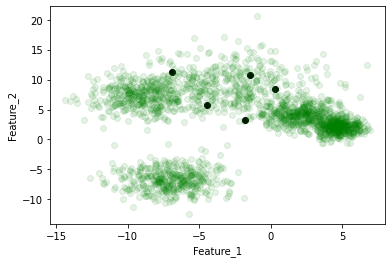

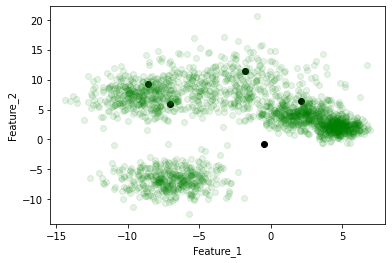

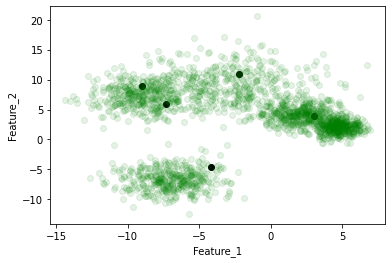

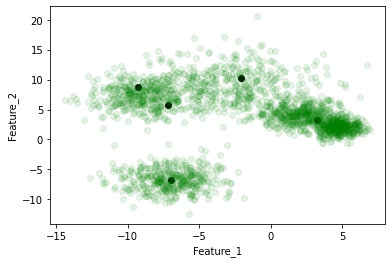

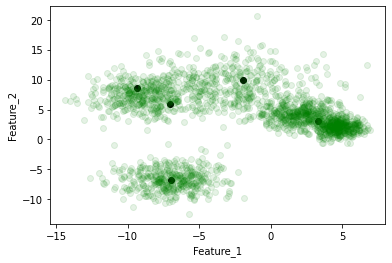

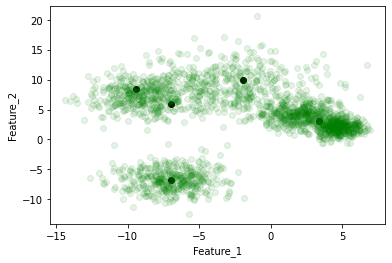

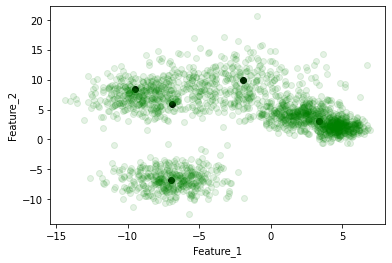

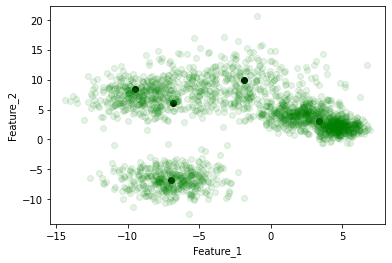

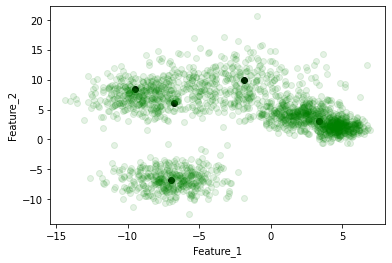

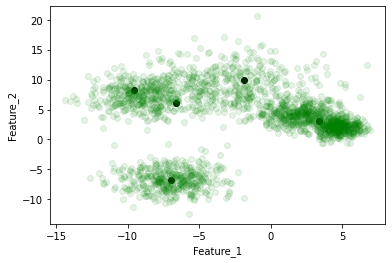

In [121]:

print_clusters(10,each_step_centroids,df)

In [30]:

#here to ensure our algorithm works fine, we will compare with sklearn K means and try to check the centroid
#it has generated for us

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)   #data is of shape [1000,]
centroid  = kmeans.cluster_centers_ 
#We can see with just 5 iterations we could find out real centroids. This is an ideal scenario because clusters 
#are distinct and clearly separable

print(centroid)
print('-------------')
print(centroids)

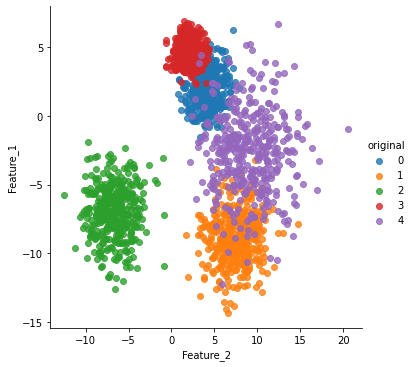

In [40]:
#adding the lables assigned by original blob maker
df['original'] = y_orig
sns.lmplot(x='Feature_2', y='Feature_1', 
           hue="original", data=df, fit_reg=False)

C:\Users\Darshan_Laptop\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


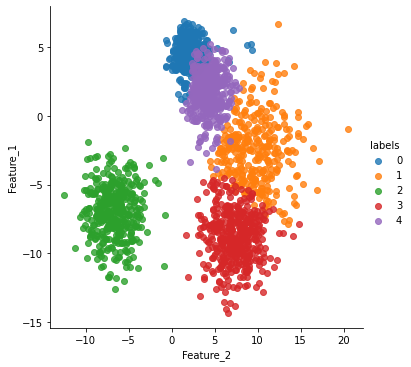

In [41]:
#Plotting our labels don't worry about the class the points assigned. Look at the cluster algorithm is trying to find out.
#Our work seems to be close to ideal scenario as compared to original work. Which was also earlier proved by running sklearn algorithm
df['labels'] = 1
for k,v in classify.items():
    df['labels'].iloc[v] = k
    
sns.lmplot(x='Feature_2', y='Feature_1', 
           hue="labels", data=df, fit_reg=False)

#### Problems with K-Means


- When you know the clusters you preceive from Data Exploration steps are not spherical in shape then k-means will missclassify those data points
- Computationally slower as you can see the time complexity is O(i * c * Q * d) --> <br>
i - iteration<br>
c - no of centres <br>
Q - data points <br>
d - features <br>
- To predict the K values it will be difficult and there are various methods to measure the clusters 
  it has formed. One is shown here to measure the density of cluster formed. Next would be Elbow method to chose ideal value for K.
- Clusters will get affected if there are outliers or many features are correlated to each other.

#### Advantages of K-Means

- Unsupervised and does not need any explicit information to group things up
- Converge well clusters are distinguisable. Also, there are variants of K-Means called K-Means ++ which handles not spherical shapes cluster
- We can converge things really fast using sochastic gradient descent rather than Lylod algorithms
- Can significantly use to reduce the dimension - heavily used in image compression

### Take Away Task

- Can you guys converge the algorithm with SGD/GD?
- Why it will converge faster then normal K-Means
- What are the advanatge and disadvantage of doing so?